# COVID-19 short analysis & data visualization
I don’t want to pour a lot of water in the introduction, you already know everything about what is COVID-19. Instead, I propose to immediately go to a brief analysis and look at the growth trends in the number of infected and mortality.

In [1]:
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.7.2-py3-none-any.whl size=14261 sha256=97805480622e7f03989180912fe03b3d3272d9b7a9636312c3755ecefb4a49ed
  Stored in directory: /root/.cache/pip/wheels/ba/e9/63/a7be983fdd9d25e31de75dd388b6f5ea8b5191c20396a6dc52
Successfully built pytrends
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
from pytrends.request import TrendReq


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv


In [3]:
open_line_data = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv')
data = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv', date_parser = 'ObservationDate')
data.rename(columns = {'Country/Region':'Country', 'ObservationDate':'Date'}, inplace = True)
all_data = data.copy()
data = data.groupby(['Date','Country']).sum().reset_index().sort_values('Date', ascending=False)
data = data.drop_duplicates(subset = ['Country'])

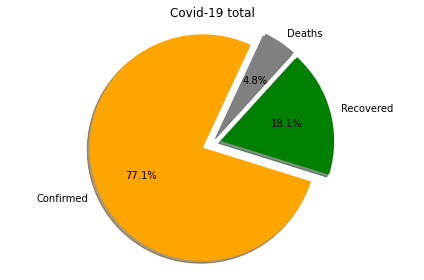

On 04/13/2020  - - - Confirmed: 1918255.0; Recovered: 449229.0; Deaths: 119492.0.


In [4]:
Confirmed = data.Confirmed.sum()
Deaths = data.Deaths.sum()
Recovered = data.Recovered.sum()

sizes = [Confirmed, Recovered, Deaths]
labels = ['Confirmed', 'Recovered', 'Deaths']

explode = (0.1, 0.07,0.07)
fig1, ax1 = plt.subplots()
ax1.set_title('Covid-19 total')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=65, colors = ['orange','green','grey'])

ax1.axis('equal')  
plt.tight_layout()
plt.show()
print('On {}  - - - Confirmed: {}; Recovered: {}; Deaths: {}.'.format(list(data.Date)[0],
                                                                      Confirmed,Recovered,Deaths))

In [5]:
from colorama import Fore, Back, Style
closed = int(data.Deaths.sum()+data.Recovered.sum())
active = int(data.Confirmed.sum() - closed)
print(Fore.CYAN, 'Closed cases: ', closed)
print('Active cases:', active)
print('Cases which had an outcome: \n Recovered: {} ({}%) \n Deaths: {} ({}%)'.format(
            int(data.Recovered.sum()), ((data.Recovered.sum()/closed)*100).round(2),
            int(data.Deaths.sum()), ((data.Deaths.sum()/closed)*100).round(2)))

 Closed cases:  568721
Active cases: 1349534
Cases which had an outcome: 
 Recovered: 449229 (78.99%) 
 Deaths: 119492 (21.01%)


On March 3, the World Health Organization established the death rate from COVID-19 as 3.4%[[1]](https://www.kaggle.com/bugonort/covid-19-analysis/#Links).

> Globally, about 3.4% of reported COVID-19 cases have died. By comparison, seasonal flu generally kills far fewer than 1% of those infected.

## Google trends

Let's see how Google’s queries changed during the COVID-19 pandemic.

In [6]:
pytrends = TrendReq()
pytrends.build_payload(
    ['quarantine', 'toilet paper'],
    cat=0, timeframe='2020-02-01 2020-04-09')

trend = pytrends.interest_over_time()
trend['timestamp'] = pd.to_datetime(trend.index)

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



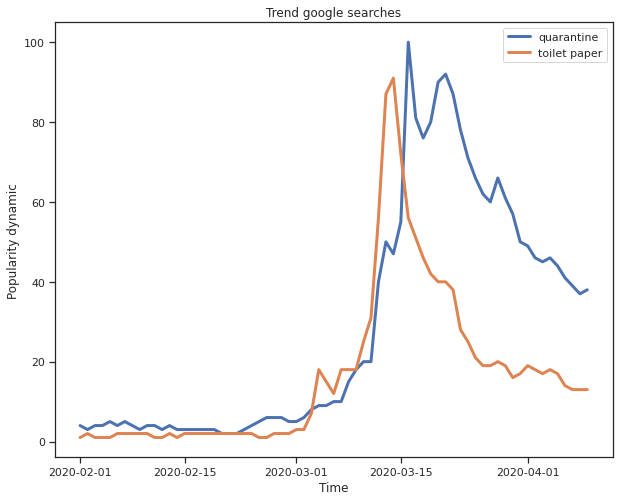

In [7]:
sns.set(style="ticks", rc={"lines.linewidth": 3})
plt.figure(figsize= (10, 8))
plt.title('Trend google searches')
sns.lineplot(x = 'timestamp', y = 'quarantine', data = trend, label = 'quarantine')
sns.lineplot(x = 'timestamp', y = 'toilet paper', data = trend, label = 'toilet paper')
plt.xlabel('Time')
plt.ylabel('Popularity dynamic')
plt.legend()

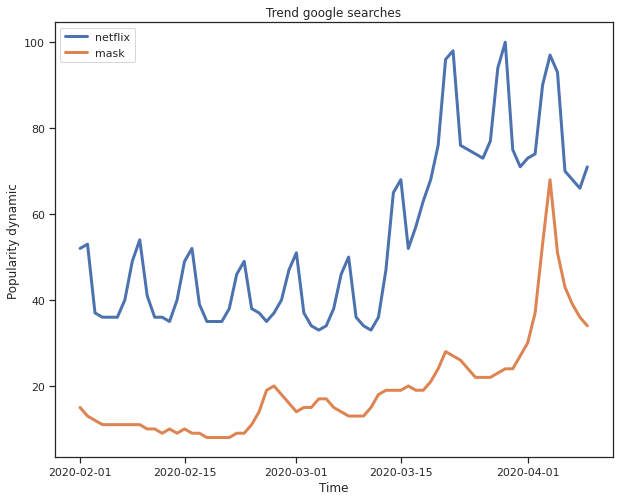

In [8]:
pytrends = TrendReq()
pytrends.build_payload(
    ['netflix', 'mask'],
    cat=0, timeframe='2020-02-01 2020-04-09')

trend = pytrends.interest_over_time()
trend['timestamp'] = pd.to_datetime(trend.index)

plt.figure(figsize= (10, 8))
plt.title('Trend google searches')
sns.lineplot(x = 'timestamp', y = 'netflix', data = trend, label = 'netflix')
sns.lineplot(x = 'timestamp', y = 'mask', data = trend, label = 'mask')
plt.xlabel('Time')
plt.ylabel('Popularity dynamic')
plt.legend()

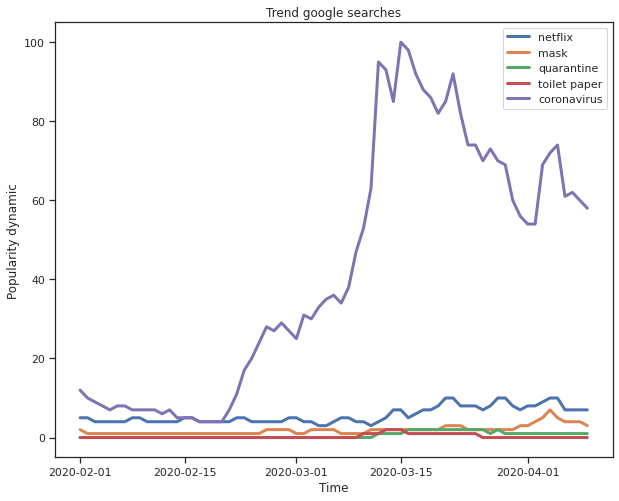

In [9]:
pytrends = TrendReq()
pytrends.build_payload(
    ['netflix', 'mask', 'quarantine', 'toilet paper', 'coronavirus'],
    cat=0, timeframe='2020-02-01 2020-04-09')

trend = pytrends.interest_over_time()
trend['timestamp'] = pd.to_datetime(trend.index)

plt.figure(figsize= (10, 8))
plt.title('Trend google searches')
sns.lineplot(x = 'timestamp', y = 'netflix', data = trend, label = 'netflix')
sns.lineplot(x = 'timestamp', y = 'mask', data = trend, label = 'mask')
sns.lineplot(x = 'timestamp', y = 'quarantine', data = trend, label = 'quarantine')
sns.lineplot(x = 'timestamp', y = 'toilet paper', data = trend, label = 'toilet paper')
sns.lineplot(x = 'timestamp', y = 'coronavirus', data = trend, label = 'coronavirus')
plt.xlabel('Time')
plt.ylabel('Popularity dynamic')
plt.legend()

It seems that the peak of requests fell in mid-March and is already gradually subsiding. Although Netflix Request remains in trend, quarantine is still ongoing.

## Age mortality
I left this point here as an example only. It does not carry statistical value, since it relies on a too small data set.

In [10]:
open_line_data.columns

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [11]:
open_line_data.drop(['Unnamed: '+str(x) for x in range(21,27)],axis=1,inplace=True)
open_line_data.drop('Unnamed: 3',axis=1,inplace=True)

In [12]:
open_line_data.death.value_counts() # We need to clear this column

0            1022
1              42
2/23/2020       4
2/26/2020       3
2/21/2020       2
2/25/2020       2
2/27/2020       2
2/19/2020       2
2/28/2020       1
2/13/2020       1
2/24/2020       1
2/14/2020       1
02/01/20        1
2/22/2020       1
Name: death, dtype: int64

In [13]:
def int_func(x): # All date values we will reduce into 1
    try:
        if int(x) != 0:
            y = 1
            return y
        else: return x
    except: return 1
    
open_line_data.death = open_line_data.death.apply(lambda x: int_func(x))

In [14]:
death_list = open_line_data.query('death == 1').death
death_age = open_line_data.query('death == 1').age # make Series with ages of people who died
fig = px.box(title = 'Ages of Covid-19 deaths',x=death_list, y=death_age)
fig.show()

But this dataset contains only ages for 2/28/2020 and have only 1085 rows which is too small, especially when real death cases is about 108512.


# Growth
Let's look at the increase in the number of infected, recovering, and dying from COVID 19. Graphs can be scaled.

In [15]:
confirmed = all_data.groupby('Date')['Confirmed'].sum()
recovered = all_data.groupby('Date')['Recovered'].sum()
dead = all_data.groupby('Date')['Deaths'].sum()

In [16]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Line(x= confirmed.index, y = confirmed, name = 'Confirmed',
                      line = dict(color = '#ff9a00', width=3)))
fig.add_trace(go.Line(x= recovered.index, y = recovered, name = 'Recovered',
                      line = dict(color = '#4BE159', width=3)))
fig.add_trace(go.Line(x= dead.index, y = dead, name = 'Deaths',
                      line = dict(color = '#7A7172', width=3)))

fig.update_layout(legend_title='<b> Cases: </b>')
fig.update_xaxes(ticks="inside", title_text="Date")
fig.update_yaxes(ticks="outside", title_text="Num of cases")
fig.update_layout(title_text='Covid-19 timeline cases')
fig.update_layout(xaxis_rangeslider_visible=True)

fig.show()

/opt/conda/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [17]:
italy = all_data.query('Country == "Italy"').copy()
italy_confirmed = italy.groupby('Date')['Confirmed'].sum()
italy_recovered = italy.groupby('Date')['Recovered'].sum()
italy_dead = italy.groupby('Date')['Deaths'].sum()


fig = go.Figure()
fig.add_trace(go.Line(x= italy_confirmed.index, y = italy_confirmed, name = 'Confirmed',
                      line = dict(color = '#ff9a00', width=4)))

fig.add_trace(go.Line(x= italy_recovered.index, y = italy_recovered, name = 'Recovered',
                      line = dict(color = '#4BE159', width=4)))
              
fig.add_trace(go.Line(x= italy_dead.index, y = italy_dead, name = 'Deaths',
                      line = dict(color = '#7A7172', width=4)))

fig.add_trace(go.Line(x=['02/23/2020','02/23/2020'], y=[0,italy_confirmed.max()],
                      name = 'First lockdowns',line = dict(color = '#353839', dash = 'dash')))

fig.add_trace(go.Line(x=['03/04/2020','03/04/2020'], y=[0,italy_confirmed.max()],
                      name = 'Schools closed',line = dict(color = '#353839', dash = 'dash')))

fig.add_trace(go.Line(x=['03/09/2020','03/09/2020'], y=[0,italy_confirmed.max()],
                      name = 'Nationwide lockdown',line = dict(color = '#353839', dash = 'dash')))

fig.add_trace(go.Line(x=['03/22/2020','03/22/2020'], y=[0,italy_confirmed.max()],
                      name = 'Factories are closed',line = dict(color = '#353839', dash = 'dash')))

fig.update_layout(legend_title='<b> Cases: </b>')
fig.update_xaxes(ticks="inside", title_text="Date")
fig.update_yaxes(ticks="outside", title_text="Num of cases")
fig.update_layout(title_text='Covid-19 in Italy')

fig.show()

In [18]:
ukraine = all_data.query('Country == "Ukraine"')
ukraine_confirmed = ukraine.groupby('Date')['Confirmed'].sum()
ukraine_recovered = ukraine.groupby('Date')['Recovered'].sum()
ukraine_dead = ukraine.groupby('Date')['Deaths'].sum()


fig = go.Figure()
fig.add_trace(go.Line(x= ukraine_confirmed.index, y = ukraine_confirmed, name = 'Confirmed',
                      line = dict(color = '#ff9a00', width=4)))

fig.add_trace(go.Line(x= ukraine_recovered.index, y = ukraine_recovered, name = 'Recovered',
                      line = dict(color = '#4BE159', width=4)))
              
fig.add_trace(go.Line(x= ukraine_dead.index, y = ukraine_dead, name = 'Deaths',
                      line = dict(color = '#7A7172', width=4)))

fig.add_trace(go.Line(x=['03/11/2020','03/11/2020'], y=[0,ukraine_confirmed.max()],
                      name = 'First lockdowns',line = dict(color = '#353839', dash = 'dash')))

fig.add_trace(go.Line(x=['03/25/2020','03/25/2020'], y=[0,ukraine_confirmed.max()],
                      name = 'State of emergency',line = dict(color = '#353839', dash = 'dash')))


fig.update_layout(legend_title='<b> Cases: </b>')
fig.update_xaxes(ticks="inside", title_text="Date")
fig.update_yaxes(ticks="outside", title_text="Num of cases")
fig.update_layout(title_text='Covid-19 in Ukraine')

fig.show()

Here you need to understand that coronavirus, like other viruses, has its own growth rate[[2](https://www.kaggle.com/bugonort/covid-19-analysis/#Links)]. Also, you need to understand that the growth rate of the number of people infected before and after special measures taken by the country can vary. You also need to take into account that after the introduction of quarantine, approximately 2-14 more days of the incubation period pass, so that people who become infected when they come in contact with others before quarantine is introduced can become ill and appear on the graph after. In addition, each country has a different number of tests and a different quality of patient screening.

# Bonus graph

In [19]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1934710" data-url="https://flo.uri.sh/visualisation/1934710/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

# Links
1. [WHO Director-General's opening remarks at the media briefing on COVID-19 - 3 March 2020](https://www.who.int/dg/speeches/detail/who-director-general-s-opening-remarks-at-the-media-briefing-on-covid-19---3-march-2020)-World Health Organization, March 3, 2020
2. [https://youtu.be/Kas0tIxDvrg](https://youtu.be/Kas0tIxDvrg) - Exponential growth and epidemics